# Data Anlysis and Exploration

## Utilizing Data From:
 - Box Office Mojo
 - Twitter

## Import Libraries

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataframe and get some high level information

In [352]:
df = pd.read_csv("Mojo_Plus_IMDB_Data.csv").drop(['Unnamed: 0', 'Unnamed: 0_y'], axis=1)
df.drop_duplicates('Title', inplace=True) # drop duplicates 
df = df.reset_index()

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             4013 non-null   int64  
 1   Title                             4013 non-null   object 
 2   Gross                             4013 non-null   float64
 3   Max_Theaters                      4013 non-null   int64  
 4   Opening_Weekend_Theaters          4013 non-null   int64  
 5   Opening_Weekend_Gross             4013 non-null   float64
 6   Opening_Weekend_Percent_of_Gross  4013 non-null   float64
 7   Distributor                       4013 non-null   object 
 8   Genres                            3968 non-null   object 
 9   Rating                            1891 non-null   object 
 10  Runtime                           4013 non-null   int64  
 11  Date                              4013 non-null   object 
 12  title_

As we can see above, the columns that were merged in from IMDB have many missing values. This means that we could not find the movies we scraped from box office mojo in the IMDB dataset. This is likely due to nomenclature differences between the two sources in the title, and since we did not have the IMDB movie_ID, we had to creatively merge using the title. Still, 2388 movies is enough data to work with, and so when we analyze those columns we will be sure to analyze on this 2388 item subset dataframe.

In [354]:
df.describe()

,index,Gross,Max_Theaters,Opening_Weekend_Theaters,Opening_Weekend_Gross,Opening_Weekend_Percent_of_Gross,Runtime,id,popularity,vote_average,vote_count
count,4013.000000,4.013000e+03,4013.000000,4013.000000,4.013000e+03,4013.000000,4013.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,2336.689260,1.425692e+07,640.872165,543.210815,4.386573e+06,28.579716,103.483678,348635.771001,7.888841,6.334831,808.701980
std,1329.045222,5.486010e+07,1162.782507,1147.335852,1.801162e+07,25.305868,40.134253,104544.095692,7.815444,1.278785,1879.948278
min,0.000000,7.400000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,239.000000,0.600000,0.000000,1.000000
25%,1188.000000,2.484400e+04,6.000000,1.000000,3.761000e+03,5.800000,91.000000,290595.000000,1.795000,5.700000,8.000000
50%,2365.000000,1.675810e+05,36.000000,4.000000,2.024900e+04,25.500000,101.000000,352114.000000,6.382000,6.400000,79.000000
75%,3511.000000,1.918403e+06,570.000000,205.000000,3.096940e+05,44.400000,115.000000,426264.000000,10.836000,7.000000,603.000000
max,4538.000000,9.366622e+08,4802.000000,4725.000000,3.571150e+08,189.100000,1179.000000,585724.000000,80.773000,10.000000,20175.000000


In [355]:
df.head(3)

,index,Title,Gross,Max_Theaters,Opening_Weekend_Theaters,Opening_Weekend_Gross,Opening_Weekend_Percent_of_Gross,Distributor,Genres,Rating,...,title_lowercase,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,The Woman in Black 2: Angel of Death,26501323.0,2602,2602,15027415.0,56.7,Relativity Media,"['Drama', 'Horror', 'Thriller']",PG-13,...,thewomaninblack2:angelofdeath,"[53, 27, 18]",288158.0,en,The Woman in Black 2: Angel of Death,10.240,2015-01-02,The Woman in Black 2: Angel of Death,5.1,627.0
1,1,The Search for General Tso,54275.0,13,2,9336.0,17.2,IFC Films,"['Comedy', 'Documentary', 'History', 'Mystery']",NaN,...,thesearchforgeneraltso,[99],261041.0,en,The Search for General Tso,1.404,2014-04-20,The Search for General Tso,6.7,31.0
2,2,The Taking of Tiger Mountain,228984.0,13,7,50621.0,22.1,Well Go USA Entertainment,"['Action', 'Adventure', 'Biography', 'History'...",NaN,...,thetakingoftigermountain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question
### How does the number of theaters available for a movie correlate with gross revenue?

Correlation Coefficient: 0.6597482228927846


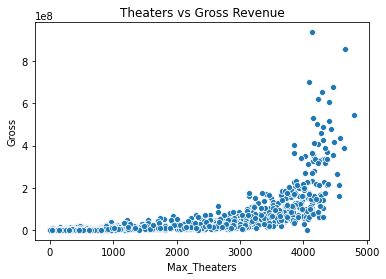

In [356]:
sns.scatterplot(data=df, x='Max_Theaters', y='Gross')
plt.title('Theaters vs Gross Revenue')
#plt.show()
plt.savefig('/Users/brianmccabe/Desktop/Theaters_vs_Gross')
print('Correlation Coefficient: {}'.format(np.corrcoef(df['Max_Theaters'], df['Gross'])[0][1]))

From the above, we can see that the number of theaters compared with the revenue is positively correlated. This is something Microsoft should keep in mind when working on their movie. Investing in more theater showtimes could yield positive results

## Question
### What genre tends to do well?

In [357]:
# The goal in the next few cells is to create a list of unique genres found in our dataset
genres = []

In [358]:
# This cell loops through and creates a huge list of genres, but containing dupes at first. We then create a set of
# the list, and then convert back to a list
i = 0
for item in list(df['Genres']):
    if type(item) == str:
        list_item = item.strip('[\']').split('\', \'')
        genres = genres + list_item
        i += 1
    else:
        continue
    
genres = list(set(genres))    

In [359]:
# Create a copy of the main dataframe with just title, gross, and genres info
df_genres = df[['Title', 'Gross', 'Genres']].copy()

In [360]:
# Some genres are na, we don't need those rows
null_genres_index = df_genres[df_genres['Genres'].isna() == True].index
df_genres.drop(null_genres_index, inplace=True)


# This line adds all columns as headers. Value is 1 for a movie if the genre is included in the "Genres" column,
# and 0 if it is not. So if the genres column was ['Comedy', 'Action'] for a row, then that rows respective, new "Comedy"
# and "Action" columns would populate with a 1. All other new column headers would be zero.

for genre in genres:
    df_genres[genre] = df_genres['Genres'].apply(lambda x: 1 if genre in x else 0)



In [361]:
# testing the new df
df_genres[['Gross', 'Comedy']].groupby('Comedy').mean().iloc[0][0]

12219134.023019634

In [362]:
#create a list of dictionaries that will be used to create a new dataframe to graph gross vs genre
gross_by_genre = []
for genre in genres:
    gross = df_genres[['Gross', genre]].groupby(genre).mean().iloc[1][0]
    gross_by_genre.append({
        'Genre': genre,
        'Gross': gross
        })

In [363]:
genre_gross_df = pd.DataFrame(gross_by_genre)

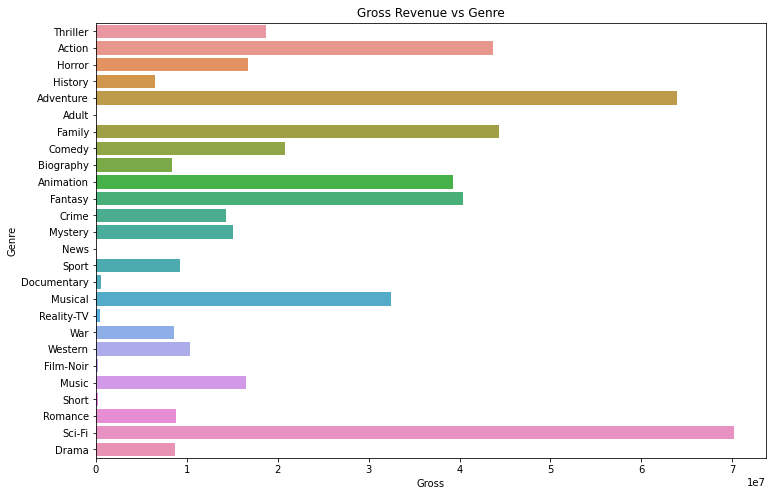

In [364]:
plt.figure(figsize=(12,8))
sns.barplot(y='Genre', x='Gross', data=genre_gross_df)
plt.title('Gross Revenue vs Genre')
plt.savefig('/Users/brianmccabe/Desktop/Genres_vs_Gross')

As we can see here from the past 5 years of movie data, adventure and sci fi movies are doing very well from a gross revenue standpoint. The numbers are almost certainly inflated from the regine of the Marvel movies, so that needs to be considered. Another point that needs to be considered is that sci fi movies likely have a higher cost of production, since the CGI and action scenes involve quite a lot of work. Though, that is not to say that an action movie can be low budget. 

Our advice to Microsoft here would be to make a movie with a genre that falls within the better half from the graph above. Adventure, scifi, action, comedy, animation, etc. Our other advice is to not make an adult film...for a number of reasons.

## Question
###  How long of a movie and what should the target audience be?

In [365]:
# drop null popularities since that column was from tmdb and has a lot of missing values
null_popularity_index = df[df['popularity'].isna()].index

In [366]:
df2 = df.drop(null_popularity_index).reset_index()


In [367]:
df2.columns

Index(['level_0', 'index', 'Title', 'Gross', 'Max_Theaters',
       'Opening_Weekend_Theaters', 'Opening_Weekend_Gross',
       'Opening_Weekend_Percent_of_Gross', 'Distributor', 'Genres', 'Rating',
       'Runtime', 'Date', 'title_lowercase', 'genre_ids', 'id',
       'original_language', 'original_title', 'popularity', 'release_date',
       'title', 'vote_average', 'vote_count'],
      dtype='object')

In [368]:
# make our df a little smaller and easier to work with
df2 = df2[['Title', 'Gross', 'Opening_Weekend_Percent_of_Gross', 'Rating', 'Runtime', 'popularity', 'vote_average', 'vote_count']]


In [369]:
#determine what long, medium, and short are. Will use these values below
print(np.percentile(df2['Runtime'], 33))
print(np.percentile(df2['Runtime'], 66))

93.0
105.0


In [370]:
# create a new categorical column called movie length
df2['Movie_Length'] = df2['Runtime'].apply(lambda x: 'Long' if x > 109 else ('Medium' if (x<=109 and x>96) else 'Short'))

In [371]:
# drop all nas
df2 = df2.dropna()

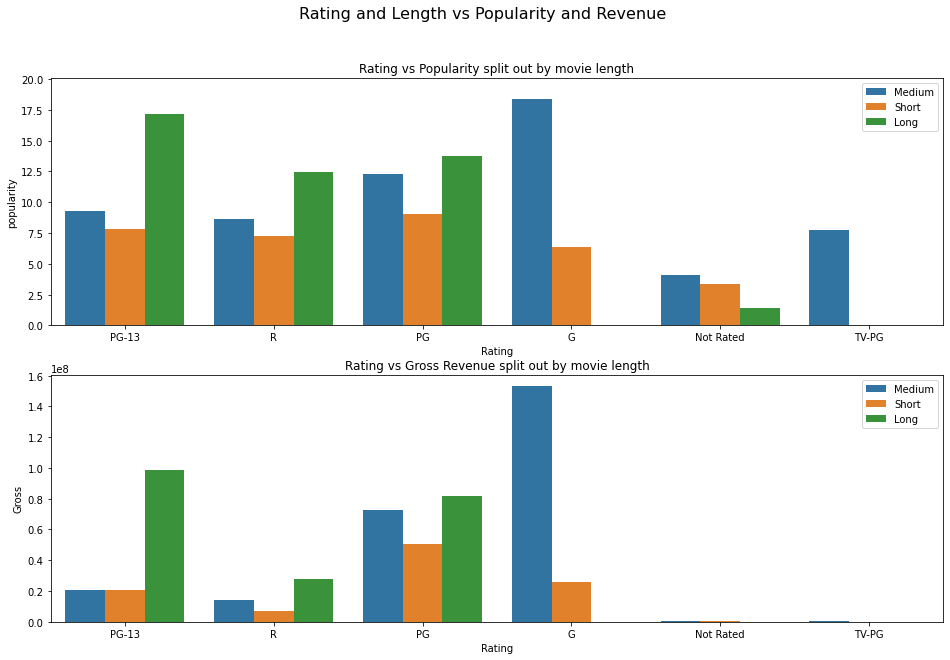

In [372]:
# Plot results for popularity

fig_df2 = plt.figure(figsize=(16,10))
fig_df2.suptitle('Rating and Length vs Popularity and Revenue', fontsize=16)

ax1 = fig_df2.add_subplot(211)
ax1.set_title('Rating vs Popularity split out by movie length')
sns.barplot(data=df2, x='Rating', y='popularity', hue='Movie_Length', ax=ax1, errwidth=0)
ax1.legend(loc='upper right')


ax2 = fig_df2.add_subplot(212)
ax2.set_title('Rating vs Gross Revenue split out by movie length')
sns.barplot(data=df2, x='Rating', y='Gross', hue='Movie_Length', ax=ax2, errwidth=0)
ax2.legend(loc='upper right')



fig_df2.savefig('/Users/brianmccabe/Desktop/Popularity_Rating_Length')

The results above can be analyzed to help determine the length of the movie and the maturity level of the movie.

From both graphs, it is interesting to note that longer movies tend to do better both in terms of popularity and revenue when the movie is targeted at a more adult audience (PG13, PG, R). Howecver, for G rated movies, medium/shorter movies tend to do better. This could be due to the fact that many children that watch G rated movies likely have shorter attention spans than the average adult.

Our recommendation to Microsoft is to make a long movie for any adult genre. If Microsoft wishes to make a G rated movie, then we recommend shortening the runtime.



## Question - What genre movies get the most traffic on social media?

### Twitter Analysis

The below section will show aggregate twitter data (likes, retweets, replies), specifically the median, across movie genres. At the end of the section we will explain our findings. However, an important note is that this data is not to be heavily relied on by any means. The data coming in from twitter is not akin to real, statistical data from places like box office mojo or imdb. For this reason, all analysis in this section should be seen as supplemental and not used to based any important decisions on.


In [188]:
twitter_df = pd.read_csv('twitter_movies.csv') # import dataset that was achieved from our twitter twint file

In [189]:
twitter_df.head()

,Unnamed: 0,Movie,Likes,Retweets,Replies
0,0,The Woman in Black 2: Angel of Death,1,0,0
1,1,The Search for General Tso,1,0,0
2,2,The Taking of Tiger Mountain,1,0,0
3,3,Li'l Quinquin,142,125,9
4,4,Trace Amounts,142,125,9


In [190]:
# create column to merge on and merge with the df_genres dataset we created above
df_genres['Title_LC'] = df_genres['Title'].apply(lambda x: x.lower().replace(" ",""))
twitter_df['Title_LC'] = twitter_df['Movie'].apply(lambda x: x.lower().replace(" ",""))

In [191]:
twitter_df = twitter_df.merge(df_genres, how='left', on='Title_LC')

In [221]:
#testing what we'll eventually be showing
twitter_df[['Likes', 'Comedy']].groupby('Comedy').median().iloc[1][0]

46

In [222]:
twitter_df[['Likes', 'Comedy']].groupby('Comedy').median().iloc[1][0]

46

In [224]:
twitter_df[['Likes', 'Comedy']].groupby('Comedy').median()

,Likes
Comedy,
0.0,53
1.0,46


In [180]:
## We are going to ignore the genres that are under-represented in our analysis for tweets, otherwise genres
## Such as film-noir and reality-tv don't have enough data to get actionable results
## We will drop Adult, News, Reality-TV, Film-Noir, Short
genre_count = df_genres.sum()
genre_count = pd.DataFrame(genre_count)
genre_count.drop(['Title', 'Title_LC', 'Genres', 'Gross'], inplace=True)
genre_count

,0
Thriller,869
Action,706
Horror,373
History,343
Adventure,561
Adult,1
Family,350
Comedy,1158
Biography,516
Animation,260


In [181]:
# We noticed some float 'nans' in the genre column that we want to eliminate
nan_genre_index = twitter_df[twitter_df['Genres'].apply(lambda x: True if type(x)==float else False) == True].index
twitter_df.drop(nan_genre_index, inplace=True)



In [182]:
# For every genre, we will create a dictionary containing the name of the genre along with the median number of 
# likes, retweets, and replies. We will then use those dictionary to create a dataframe to graph and show our results

twitter_by_genre = []
for genre in genres:
    
    # if no values for that genre, we just add zero
    try:
        likes = twitter_df[['Likes', genre]].groupby(genre).median().iloc[1][0]
    except: 
        likes = 0
    try:   
        retweets = twitter_df[['Retweets', genre]].groupby(genre).median().iloc[1][0]
    except:    
        retweets = 0
    try:   
        replies = twitter_df[['Replies', genre]].groupby(genre).median().iloc[1][0]
    except:
        replies = 0
        
    twitter_by_genre.append({
        'Genre': genre,
        'Median Likes': likes,
        'Median Retweets': retweets,
        'Median Replies': replies
        })

In [183]:
twitter_genre_df = pd.DataFrame(twitter_by_genre)

In [184]:
twitter_genre_df = twitter_genre_df.drop([5, 13, 17, 20, 22]).reset_index().drop('index', axis=1) 

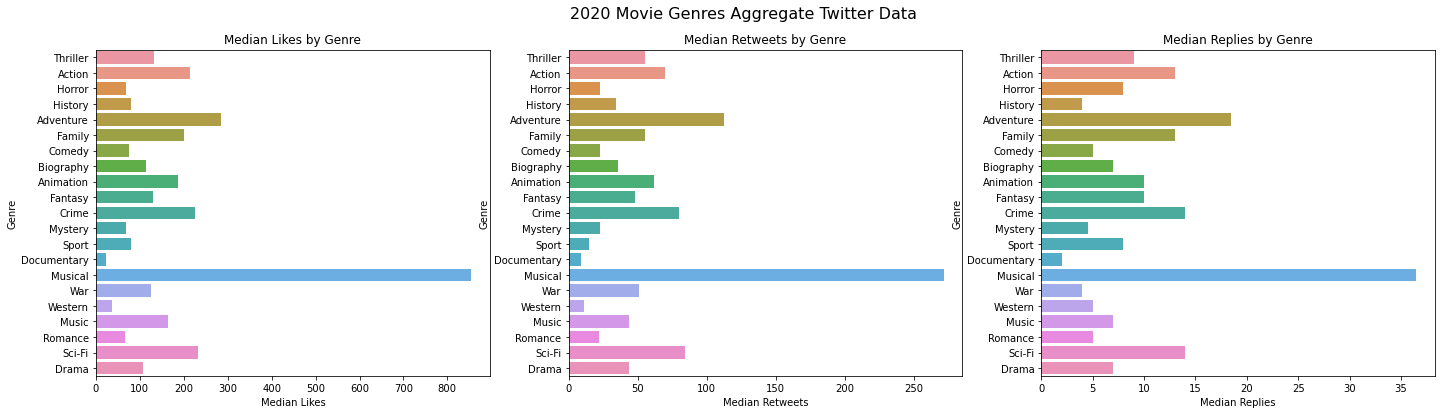

In [186]:
new_figure = plt.figure(figsize=(24,6))
new_figure.suptitle('2020 Movie Genres Aggregate Twitter Data', fontsize=16)

ax1 = new_figure.add_subplot(131)
ax1.set_title('Median Likes by Genre')
sns.barplot(y='Genre', x='Median Likes', data=twitter_genre_df, ax=ax1)

ax2 = new_figure.add_subplot(132)
ax2.set_title('Median Retweets by Genre')
sns.barplot(y='Genre', x='Median Retweets', data=twitter_genre_df, ax=ax2)

ax3 = new_figure.add_subplot(133)
ax3.set_title('Median Replies by Genre')
sns.barplot(y='Genre', x='Median Replies', data=twitter_genre_df, ax=ax3)
new_figure.savefig('/Users/brianmccabe/Desktop/Twitter_Genre_Averages')

After compiling a list of likes, retweets, and replies for top tweets for every movie, we then wanted to see how the numbers responded to grouping by movie category. From the data above, it appears that musicals get quite a lot of social media presence. This could be for a variety of reasons. (1) While musicals are not as common as action/adventure, when they are released, they are often released based on a world-famous broadway show such as Les Mis or on a world famous musician (Elton John - Rocketman), so they could amass quite a large following on social media. (2) People often times create cover-songs or even musical-parodies based off famous songs. Twitter would be a place for people to share these videos, and if one of them goes viral (either it is a very funny spoof or a really impressive work of musician-ship), it would amass a lot of likes/retweets/replies.

As far as recommendations to Microsoft, this data should be taken with a grain of salt. Data found on twitter should not be held in high standards, and certainly should not be used to make any decisions. These findings are more of a nice-to-have. Once Microsoft decides on a movie, they can check these charts, compare them with the movie genre they decided to make, and from that, can get a very rough idea of how much social media presence their movie can expect. This could help them decide on how much they should invest in social media advertizing for their movie. 